import components

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib import rc,figure
import pandas as pd
import re
import seaborn as sns
import plotly.express as px


Def Universal Function

In [133]:
# add labels to bar chart
def addlabels(x,y):
   for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center') 

def addlabels2(x,y,y1):
    for i in range(len(x)):
        plt.text(i, y1[i]//2+ y[i], y1[i], ha = 'center') 

def addlabels3(x,y,y1,y2):
    for i in range(len(x)):
        plt.text(i, y2[i]//2+ y1[i] + y[i], y2[i], ha = 'center') 

def addhlabels(x,y):
   for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], va = 'center') 
        

Read Data


In [134]:
df_original = pd.read_csv('data/data.csv', encoding='latin-1', sep=',')
df_slang = pd.read_csv('data/new_kamusalay.csv')
df = pd.read_csv('data/data_cleansed.csv', encoding='latin-1', sep=',')
df_w_abusive = pd.read_csv('data/data_cleansed_w_abusive.csv', encoding='latin-1', sep=',')
abusive_list = list(pd.read_csv('data/abusive.csv', encoding='latin-1', sep=',')['ABUSIVE'])
df_stopword = pd.read_csv('data/stopwordbahasa.csv', encoding='latin-1', sep=',',header=None)

In [135]:
df.head()

,Unnamed: 0,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,0,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,1,rt pengguna pengguna siapa yang telat memberi ...,0,1,0,0,0,0,0,0,0,0,0,0
2,2,41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,3,pengguna pengguna aku itu aku ku tau matamu ta...,0,0,0,0,0,0,0,0,0,0,0,0
4,4,pengguna pengguna kaum sudah kelihatan dongokn...,1,1,0,1,1,0,0,0,0,0,1,0


Analyze Data Frame

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     13169 non-null  int64 
 1   Tweet          13168 non-null  object
 2   HS             13169 non-null  int64 
 3   Abusive        13169 non-null  int64 
 4   HS_Individual  13169 non-null  int64 
 5   HS_Group       13169 non-null  int64 
 6   HS_Religion    13169 non-null  int64 
 7   HS_Race        13169 non-null  int64 
 8   HS_Physical    13169 non-null  int64 
 9   HS_Gender      13169 non-null  int64 
 10  HS_Other       13169 non-null  int64 
 11  HS_Weak        13169 non-null  int64 
 12  HS_Moderate    13169 non-null  int64 
 13  HS_Strong      13169 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.4+ MB


Analyze Category

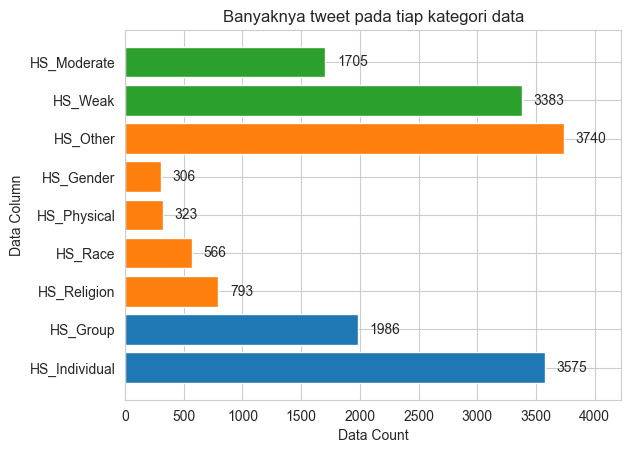

In [137]:
#select only category
df_category= df.iloc[:,4:-1]
category_count = {}
for category in df_category:
    category_count[category]=df_category[category].sum()

category_count
plt.barh(list(category_count.keys()), list(category_count.values()),
         color=['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange','tab:orange','tab:green', 'tab:green', 'tab:green'])

# Add labels and title
for i, v in enumerate(list(category_count.values())):
    plt.text(v + 100, i, str(v), ha='left', va='center')
_, xmax = plt.xlim()
plt.xlim(0, xmax+300)
plt.xlabel("Data Count")
plt.ylabel("Data Column")
plt.title("Banyaknya tweet pada tiap kategori data")
plt.show()

Add Total Word Column

In [138]:
df['Tweet']=df['Tweet'].map(str)
df['total_word']=df.Tweet.apply(lambda words: len(words.split(' ')))
df_w_abusive['total_word']=df_w_abusive.Tweet.apply(lambda words: len(words.split(' ')))

Transpose HS

Text(0.5, 1.0, 'Klasifikasi data tweet hate speech terhadap jumlah kata')

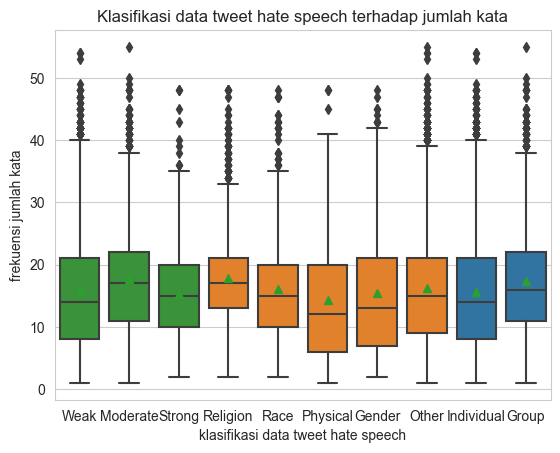

In [139]:

df_hs_religion   = df.loc[(df['HS_Religion']==1)].copy()
df_hs_race       = df.loc[(df['HS_Race']==1)].copy()
df_hs_physical   = df.loc[(df['HS_Physical']==1)].copy()
df_hs_gender     = df.loc[(df['HS_Gender']==1)].copy()
df_hs_other      = df.loc[(df['HS_Other']==1)].copy()
df_hs_individual = df.loc[(df['HS_Individual']==1)].copy()
df_hs_group      = df.loc[(df['HS_Group']==1)].copy()
df_hs_weak       = df.loc[(df['HS_Weak']==1)].copy()
df_hs_moderate   = df.loc[(df['HS_Moderate']==1)].copy()
df_hs_strong     = df.loc[(df['HS_Strong']==1)].copy()

#assign class
df_hs_religion['class']='Religion'
df_hs_race['class']='Race'
df_hs_physical['class']='Physical'
df_hs_gender['class']='Gender'
df_hs_other['class']='Other'
df_hs_individual['class']='Individual'
df_hs_group['class']='Group'
df_hs_weak['class']='Weak'
df_hs_moderate['class']='Moderate'
df_hs_strong['class']='Strong'





#concat data frame
transpose_df = pd.concat([df_hs_weak,df_hs_moderate,df_hs_strong,df_hs_religion, df_hs_race, df_hs_physical, df_hs_gender, df_hs_other,df_hs_individual,df_hs_group])
sns.set_style('whitegrid')
my_pal = {'Individual':'tab:blue', 'Group':'tab:blue', 'Religion':'tab:orange', 'Race':'tab:orange', 'Physical':'tab:orange', 'Gender':'tab:orange','Other':'tab:orange','Weak':'tab:green', 'Moderate':'tab:green', 'Strong':'tab:green'}
sns.boxplot(x=transpose_df['class'], y=transpose_df['total_word'], showmeans = True, palette=my_pal)
plt.xlabel('klasifikasi data tweet hate speech')
plt.ylabel('frekuensi jumlah kata')
plt.title('Klasifikasi data tweet hate speech terhadap jumlah kata')

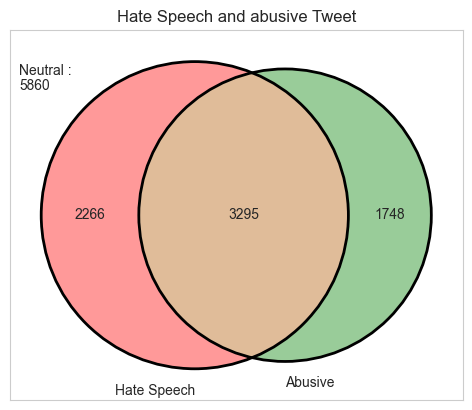

In [140]:
# Data classification
df_neutral    = df.loc[(df['HS']==0)&(df['Abusive']==0)]
df_hs         = df.loc[(df['HS']==1)&(df['Abusive']==0)]
df_abusive    = df.loc[(df['Abusive']==1)&(df['HS']==0)]
df_hs_abusive = df.loc[(df['HS']==1)&(df['Abusive']==1)]

# Depict venn diagram
v = venn2(subsets   = (len(df_hs), len(df_abusive), len(df_hs_abusive)),
      set_labels    = ('Hate Speech', 'Abusive'))
      
  
# Add outsider in universal set
plt.text(-0.7,0.45,'Neutral :')
plt.text(-0.7,0.4,len(df_neutral))

# set fontsize
for text in v.set_labels:
    text.set_fontsize(10)

# add outline
venn2_circles(subsets=(len(df_hs), len(df_abusive), len(df_hs_abusive)))

# add Title
plt.title("Hate Speech and abusive Tweet")
plt.axis('on')
plt.show()

Analyze total word

1 65


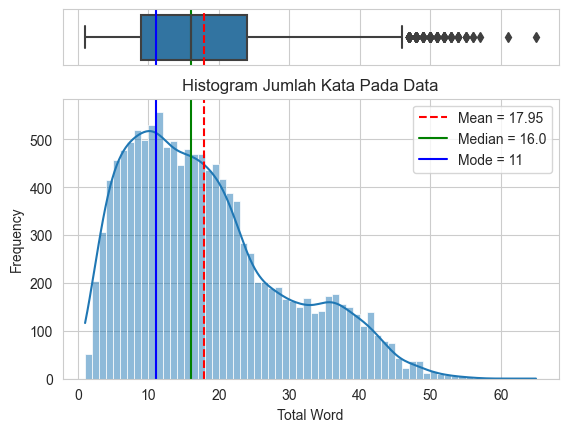

In [141]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['total_word'].mean()
median=df['total_word'].median()
mode=df['total_word'].mode().values[0]

sns.boxplot(data=df, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Word")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Histogram Jumlah Kata Pada Data")
ax_hist.legend()
ax_box.set(xlabel='')
print(df['total_word'].min(),df['total_word'].max())

Abusive and Hate Speech Relationship

Text(0.5, 1.0, 'Klasifikasi data tweet terhadap jumlah kata')

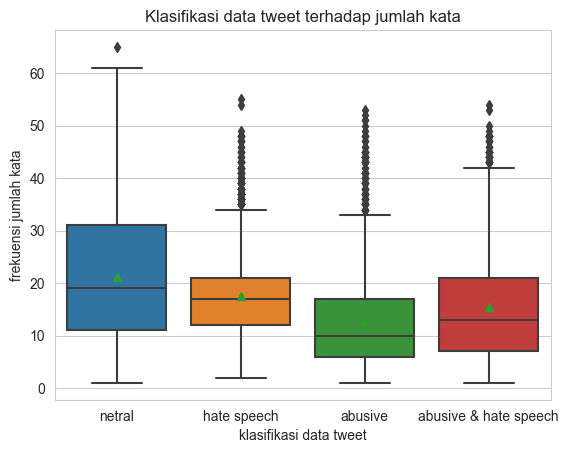

In [142]:
df_neutral    = df.loc[(df['HS']==0)&(df['Abusive']==0)]
df_hs         = df.loc[(df['HS']==1)&(df['Abusive']==0)]
df_abusive    = df.loc[(df['Abusive']==1)&(df['HS']==0)]
df_hs_abusive = df.loc[(df['HS']==1)&(df['Abusive']==1)]

#get total word for each class
transpose_df_neutral=df_neutral.copy()
transpose_df_hs=df_hs.copy()
transpose_df_abusive=df_abusive.copy()
transpose_df_hs_abusive=df_hs_abusive.copy()

#assign class
transpose_df_neutral['class']='netral'
transpose_df_hs['class']='hate speech'
transpose_df_abusive['class']='abusive'
transpose_df_hs_abusive['class']='abusive & hate speech'

#concat data frame
transpose_df = pd.concat([transpose_df_neutral,transpose_df_hs,transpose_df_abusive,transpose_df_hs_abusive])
sns.set_style('whitegrid')
sns.boxplot(x=transpose_df['class'],y=transpose_df['total_word'],showmeans = True)
plt.xlabel('klasifikasi data tweet')
plt.ylabel('frekuensi jumlah kata')
plt.title('Klasifikasi data tweet terhadap jumlah kata')

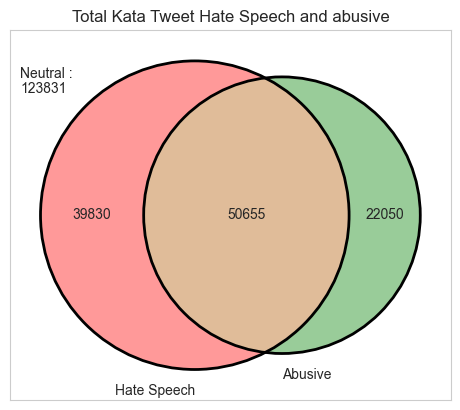

In [143]:
#Find Word sum fo every class
neutral_word = df_neutral.total_word.sum()
hs_word = df_hs.total_word.sum()
abusive_word = df_abusive.total_word.sum()
hs_abusive_word = df_hs_abusive.total_word.sum()

# Depict venn diagram
v = venn2(subsets   = (hs_word, abusive_word, hs_abusive_word),
      set_labels    = ('Hate Speech', 'Abusive'))
  
# Add outsider in universal set
plt.text(-0.7,0.45,'Neutral :')
plt.text(-0.7,0.4, neutral_word)

# set fontsize
for text in v.set_labels:
    text.set_fontsize(10)

# add outline
venn2_circles(subsets=(hs_word, abusive_word, hs_abusive_word))

# add Title
plt.title("Total Kata Tweet Hate Speech and abusive")

plt.axis('on')
plt.show()

[Text(0.5, 0, '')]

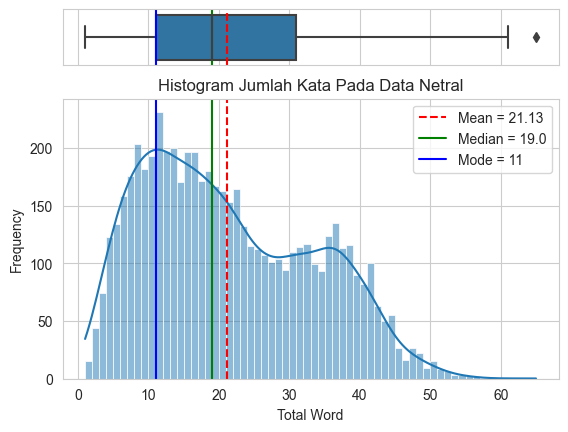

In [144]:
# Get hist for neutral data
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_neutral['total_word'].mean()
median=df_neutral['total_word'].median()
mode=df_neutral['total_word'].mode().values[0]

sns.boxplot(data=df_neutral, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_neutral, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Word")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Histogram Jumlah Kata Pada Data Netral")

ax_hist.legend()

ax_box.set(xlabel='')

[Text(0.5, 0, '')]

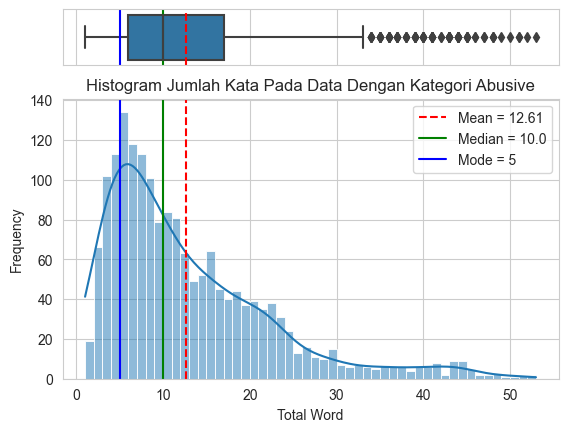

In [145]:
# Get hist for abusive data
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_abusive['total_word'].mean()
median=df_abusive['total_word'].median()
mode=df_abusive['total_word'].mode().values[0]

sns.boxplot(data=df_abusive, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_abusive, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Word")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Histogram Jumlah Kata Pada Data Dengan Kategori Abusive")

ax_hist.legend()

ax_box.set(xlabel='')

[Text(0.5, 0, '')]

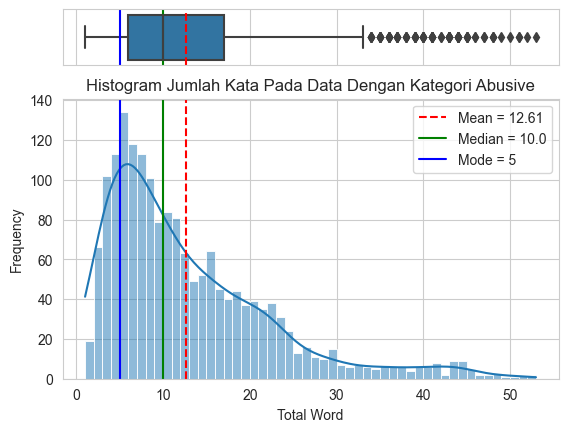

In [146]:
# Get hist for abusive data
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_abusive['total_word'].mean()
median=df_abusive['total_word'].median()
mode=df_abusive['total_word'].mode().values[0]

sns.boxplot(data=df_abusive, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_abusive, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Word")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Histogram Jumlah Kata Pada Data Dengan Kategori Abusive")

ax_hist.legend()

ax_box.set(xlabel='')

[Text(0.5, 0, '')]

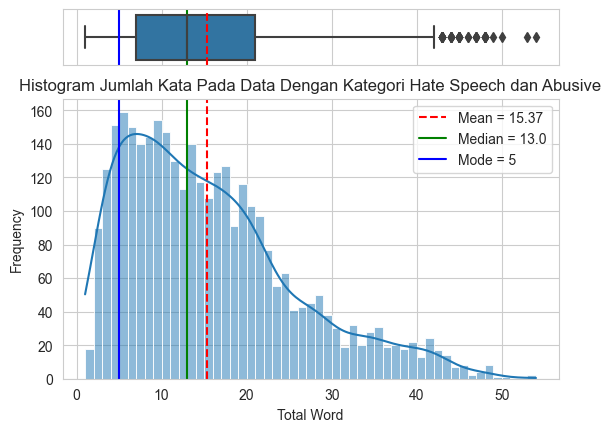

In [147]:
# Get hist for hate speech data
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_hs_abusive['total_word'].mean()
median=df_hs_abusive['total_word'].median()
mode=df_hs_abusive['total_word'].mode().values[0]

sns.boxplot(data=df_hs_abusive, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_hs_abusive, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Word")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Histogram Jumlah Kata Pada Data Dengan Kategori Hate Speech dan Abusive")

ax_hist.legend()

ax_box.set(xlabel='')

Analisa kata abusive

1.548339638503573

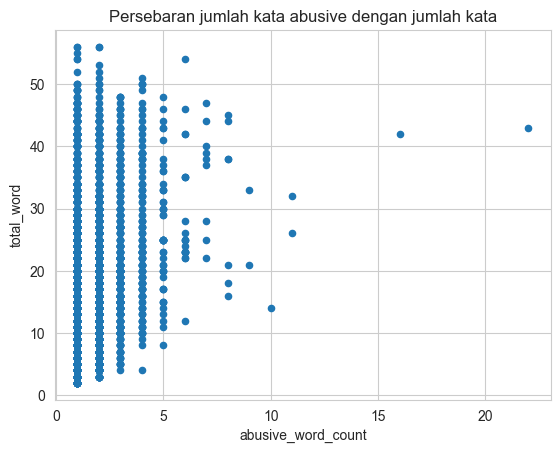

In [148]:
df_abusive_inclusive = df_w_abusive.loc[(df_w_abusive['Abusive']==1)]
def abusive_word_counter(text):
    counter = 0
    for word in text.split(' '):
        if word in abusive_list:
            counter = counter+1
    return counter
df_abusive_inclusive_count=df_abusive_inclusive.copy()
#add abusive word count
df_abusive_inclusive_count['abusive_word_count']=df_abusive_inclusive.Tweet.apply(abusive_word_counter)
#remove 0 occurences
df_abusive_inclusive_count=df_abusive_inclusive_count.loc[df_abusive_inclusive_count['abusive_word_count']!=0]
#plot in scatter
df_abusive_inclusive_count.plot(x='abusive_word_count',y='total_word', kind='scatter')
plt.title('Persebaran jumlah kata abusive dengan jumlah kata')
df_abusive_inclusive_count.abusive_word_count.mean()

Heat map abusive word count with total word

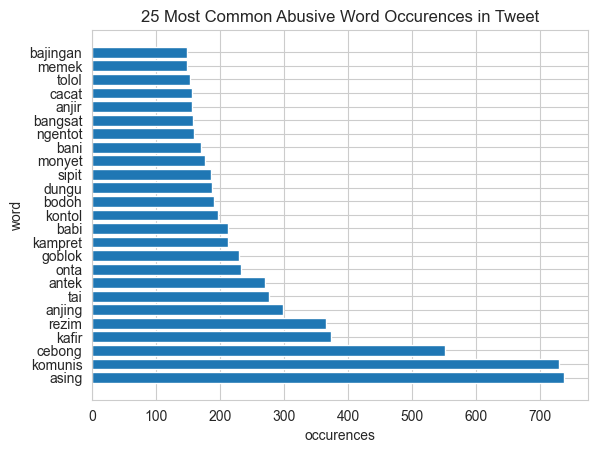

In [149]:
tweet = df_w_abusive.Tweet.str.cat(sep=" ").split(' ')
count_abusive_occurences = {}
# count occurences from abusive dictionary
for word in abusive_list:
    count_abusive_occurences[word]=tweet.count(word)
count_abusive_occurences = dict(sorted(count_abusive_occurences.items(), key=lambda item:item[1], reverse=True))
# Plot top 25 most common
x=list(count_abusive_occurences.keys())[:25]
y=list(count_abusive_occurences.values())[:25]
plt.barh(x, y)
plt.title('25 Most Common Abusive Word Occurences in Tweet')
plt.ylabel('word')
plt.xlabel('occurences')
plt.show()

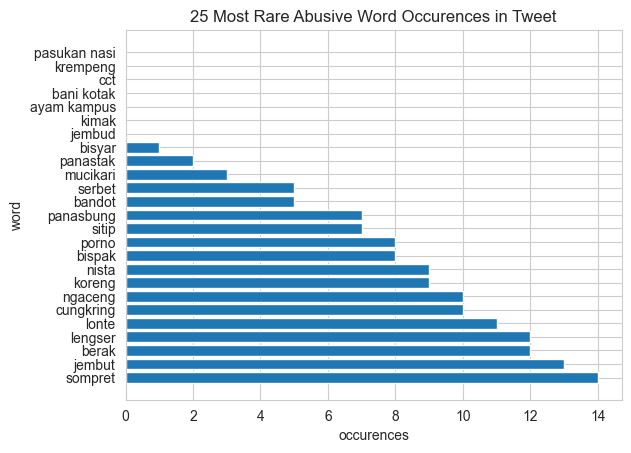

In [150]:
# Plot top 25 most rare
x=list(count_abusive_occurences.keys())[-25:]
y=list(count_abusive_occurences.values())[-25:]
plt.barh(x, y)
plt.title('25 Most Rare Abusive Word Occurences in Tweet')
plt.ylabel('word')
plt.xlabel('occurences')
plt.show()

Map Word Frequency for each class

In [151]:
#turn stop word data frame into dictionary
stop_words = list(df_stopword.iloc[:,0])
#create function to get a DataFrame
def get_df(input_list, data_class):
    #remove stop words
    set_words_full = list(set(input_list))
    set_words = [i for i in set_words_full if i not in stop_words]
    
    #count each word
    count_words = [input_list.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['class']=data_class
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d
#declare each tweet class
tweet_hs = df_hs.Tweet.str.cat(sep=" ").split(' ')
tweet_abusive = df_abusive.Tweet.str.cat(sep=" ").split(' ')
tweet_hs_abusive = df_hs_abusive.Tweet.str.cat(sep=" ").split(' ')
tweet_netral = df_neutral.Tweet.str.cat(sep=" ").split(' ')

#create df for each class
word_count_df_hs = get_df(tweet_hs, 'hs')
word_count_df_abusive = get_df(tweet_abusive, 'abusive')
word_count_df_hs_abusive = get_df(tweet_hs_abusive,'hs_abusive')
word_count_df_neutral = get_df(tweet_netral,'neutral')

#append df
word_count_all= pd.concat([word_count_df_hs[0:25],word_count_df_abusive[0:25],word_count_df_hs_abusive[0:25],word_count_df_neutral[0:25]])

#plot tree map
fig = px.treemap(word_count_all, path=[px.Constant("frekuensi kata"), 'class', 'words'],
                 values='count',
                 color='count', hover_data=['count'],
                 color_continuous_scale='viridis',
                 color_continuous_midpoint=np.average(word_count_all['count'])
                )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

Hate Speech Classifications

Hate Speech Target

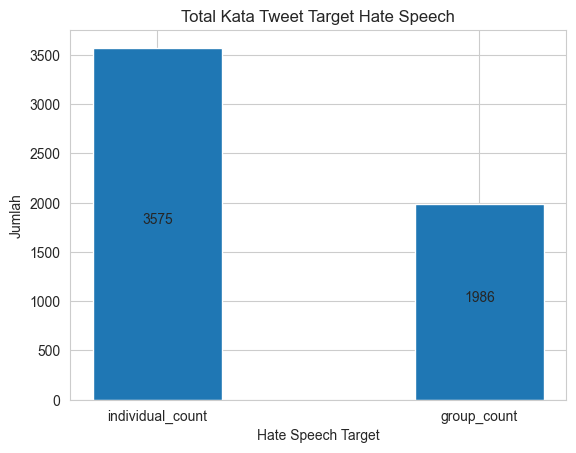

In [152]:
# data
df_individual = df.loc[df['HS_Individual']==1]
df_group = df.loc[df['HS_Group']==1]

# turn into dict
Target = ["individual_count", "group_count"]
Target_count = [len(df_individual),len(df_group)]
# Bar plot
plt.bar(Target, Target_count,
        width = 0.4)

# Add labels
addlabels(Target, Target_count)
plt.xlabel("Hate Speech Target")
plt.ylabel("Jumlah")
plt.title("Total Kata Tweet Target Hate Speech")
plt.show()

Hate Speech Type

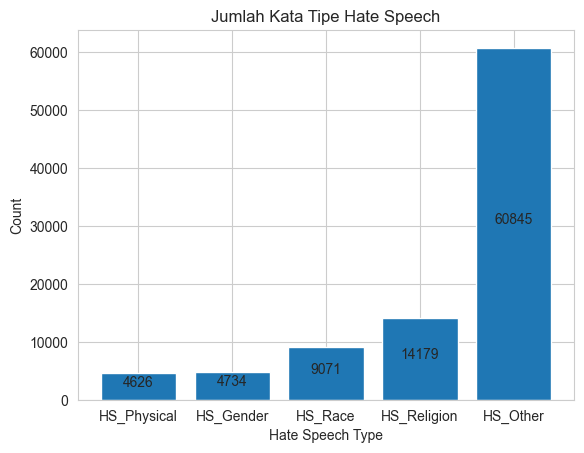

In [153]:
# Get Hate Speech Type Count


df_type = df.iloc[:,6:11]
type_count = {}
for type in df_type :
    type_count[type] = (df.loc[df[type]==1]).total_word.sum()

type_count = dict(type_count)
type_count = dict(sorted(type_count.items(), key=lambda item:item[1]))
plt.bar(type_count.keys(), type_count.values(),
        width = 0.8)

# Add labels
addlabels(list(type_count.keys()), list(type_count.values()))
plt.xlabel("Hate Speech Type")
plt.ylabel("Count")
plt.title("Jumlah Kata Tipe Hate Speech")
plt.show()

Hate Speech Level

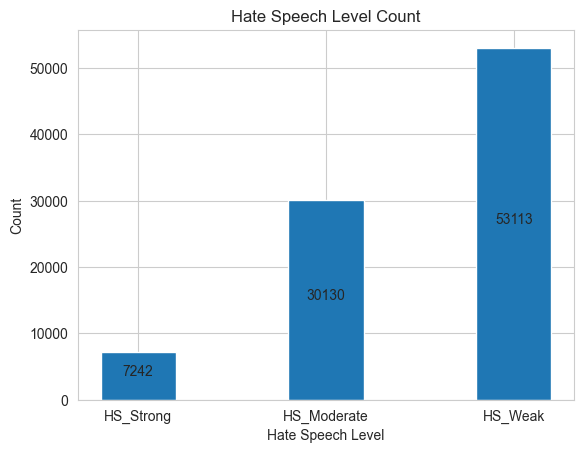

In [154]:
# Get Hate Speech Type Count
df_level = df.iloc[:,11:-1]
level_count = {}
for level in df_level :
    level_count[level] = (df.loc[df[level]==1]).total_word.sum()

level_count = dict(level_count)
level_count = dict(sorted(level_count.items(), key=lambda item:item[1]))
plt.bar(level_count.keys(), level_count.values(),
        width = 0.4)

# Add labels
addlabels(list(level_count.keys()), list(level_count.values()))
plt.xlabel("Hate Speech Level")
plt.ylabel("Count")
plt.title("Hate Speech Level Count")
plt.show()

Hate Speech Target and Hate Speech Type Relationship

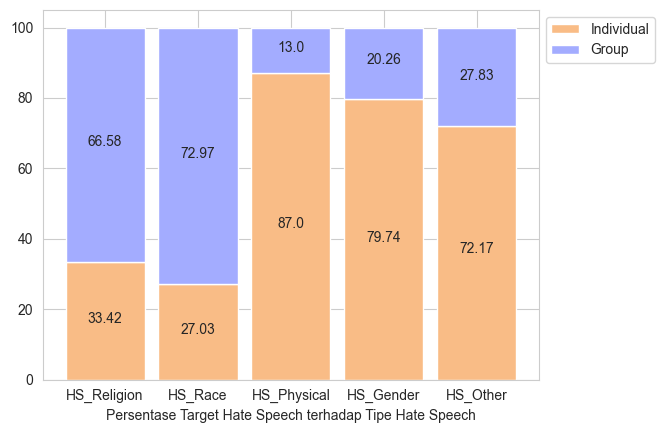

In [155]:
# data slice
individual_count_type = dict(df_individual.iloc[:,6:11].sum())
group_count_type = dict(df_group.iloc[:,6:11].sum())
r = [0,1,2,3,4]

# From raw value to percentage
totals = [i+j for i,j in zip(individual_count_type.values(), group_count_type.values())]
individualBars = [round(i / j * 100,2) for i,j in zip(individual_count_type.values(), totals)]
groupBars = [round(i / j * 100,2) for i,j in zip(group_count_type.values(), totals)]

# Plot
barWidth = 0.85
names = individual_count_type.keys()
# Create individual Bars
plt.bar(r, individualBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Individual")

# Create Group Bars
plt.bar(r, groupBars, bottom=individualBars, color='#a3acff', edgecolor='white', width=barWidth, label="Group")

# Add label
plt.xticks(r, names)
plt.xlabel("Persentase Target Hate Speech terhadap Tipe Hate Speech")
addlabels(r, individualBars)
addlabels2(r, individualBars, groupBars)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)



# Show graphic
plt.show()

Hate Speech Level and Hate Speech Type Relationship

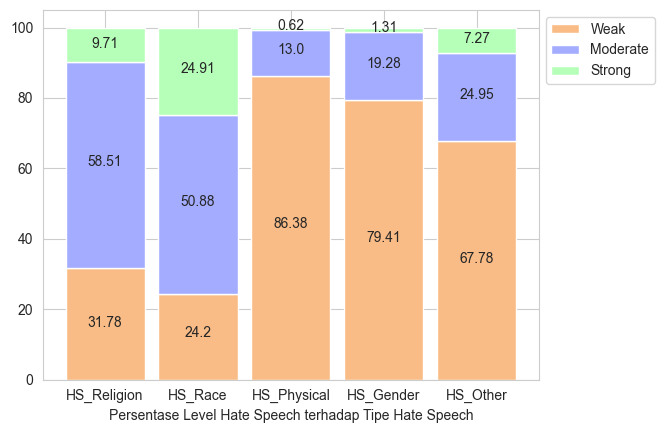

In [156]:
# data slice
weak_count_type = dict(df.loc[df['HS_Weak']==1].iloc[:,6:11].sum())
moderate_count_type = dict(df.loc[df['HS_Moderate']==1].iloc[:,6:11].sum())
strong_count_type = dict(df.loc[df['HS_Strong']==1].iloc[:,6:11].sum())
r = [0,1,2,3,4]

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(weak_count_type.values(), moderate_count_type.values(), strong_count_type.values())]
weakBars = [round(i / j * 100,2) for i,j in zip(weak_count_type.values(), totals)]
moderateBars = [round(i / j * 100,2) for i,j in zip(moderate_count_type.values(), totals)]
strongBars = [round(i / j * 100,2) for i,j in zip(strong_count_type.values(), totals)]

# Plot
barWidth = 0.85
names = weak_count_type.keys()
# Create weak Bars
plt.bar(r, weakBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Weak")

# Create moderate Bars
plt.bar(r, moderateBars, bottom=weakBars, color='#a3acff', edgecolor='white', width=barWidth, label="Moderate")

# Create strong Bars
plt.bar(r, strongBars, bottom=[i+j for i,j in zip(weakBars, moderateBars)], color='#b5ffb9', edgecolor='white', width=barWidth, label="Strong")

# Add label
plt.xticks(r, names)
plt.xlabel("Persentase Level Hate Speech terhadap Tipe Hate Speech")

addlabels(r,weakBars)
addlabels2(r,weakBars, moderateBars)
addlabels3(r,weakBars, moderateBars, strongBars)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

Hate Speech Level Occurences


1.4767128214349936

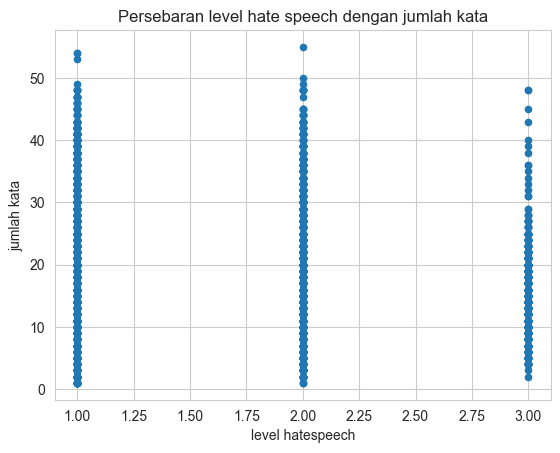

In [157]:
df_level = df.iloc[:,[11,12,13,-1]].copy()
df_level['level']=0
df_level['level'].loc[df_level['HS_Weak']==1]=1
df_level['level'].loc[df_level['HS_Moderate']==1]=2
df_level['level'].loc[df_level['HS_Strong']==1]=3
df_level = df_level.loc[df_level['level']>0]
df_level.plot(x='level',y='total_word', kind='scatter')
plt.xlabel("level hatespeech")
plt.ylabel("jumlah kata")
plt.title('Persebaran level hate speech dengan jumlah kata')
df_level.level.mean()

number of category occurences

1.0300305700413595

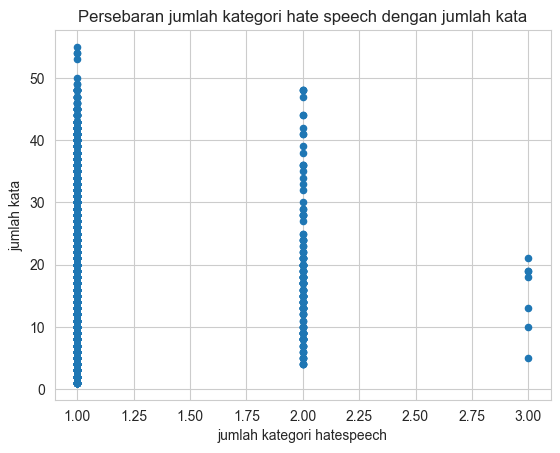

In [158]:
df_hs_type = df.iloc[:,[6,7,8,9,10,-1]].copy()
df_hs_type["count_hs_type"]=df_hs_type["HS_Religion"]+df_hs_type["HS_Race"]+df_hs_type["HS_Physical"]+df_hs_type["HS_Gender"]+df_hs_type["HS_Other"]
count_hs_type = list(df_hs_type["count_hs_type"].loc[df_hs_type["count_hs_type"]>0])
df_hs_type=df_hs_type.loc[df_hs_type["count_hs_type"]>0]
df_hs_type.plot(x='count_hs_type',y='total_word', kind='scatter')
plt.xlabel("jumlah kategori hatespeech")
plt.ylabel("jumlah kata")
plt.title('Persebaran jumlah kategori hate speech dengan jumlah kata')
df_hs_type.count_hs_type.mean()